In [15]:
using HDF5
using Plots

In [16]:
res_file_name = "Kurt_LSID_ACx0S_2022-Sep-29_at_21-19.h5"

"Kurt_LSID_ACx0S_2022-Sep-29_at_21-19.h5"

In [17]:
function get_keys(df)
    h5open(df, "r") do file
        return keys(file)
    end
end

function get_kurt_lsid(file, γ_group)

    h5open(file,"r") do fid # read-only
        A = read(fid[γ_group]["A"])
        Ac = read(fid[γ_group]["Ac"])
        C = read(fid[γ_group]["C"])
        x₀ = read(fid[γ_group]["x0"])
        n = read(fid[γ_group]["n"])
        Σ = read(fid[γ_group]["sigma"])
        
        return A, Ac, C, x₀, n, Σ
    end
end

get_kurt_lsid (generic function with 1 method)

In [19]:
#directory = "C:/Users/Zakhar/Documents/GitHub/JPOP_SID/DATA/"
directory = "C:/Users/Zakhar/Documents/GitHub/Kurt2021/2022JAN24/DATA/"

res_file_name = "Kurt_LSID_ACx0S_2022-Sep-29_at_21-19.h5"
γ = get_keys(directory*res_file_name)
γ = [string(chop(γᵢ, head = 6, tail = 0)) for γᵢ in γ]

8-element Vector{String}:
 "0.079477"
 "0.25133"
 "0.79477"
 "2.5133"
 "25.133"
 "251.33"
 "7.9477"
 "79.477"

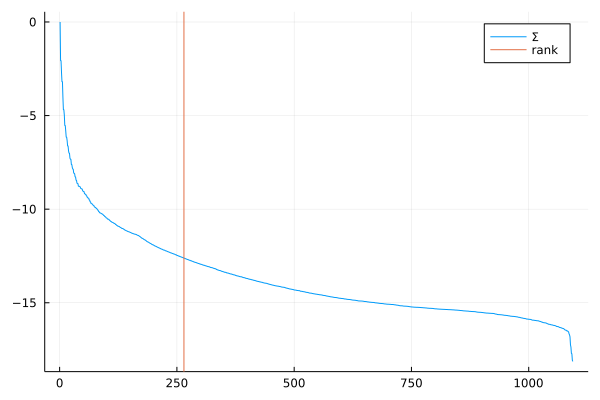

In [39]:
A, Ac, C, x₀, n, Σ = get_kurt_lsid(directory*res_file_name, "gamma_"*γ[1])
x = 1:length(Σ'); y = Σ'
plot(x, y, label = "Σ")
vline!([n], label = "rank")

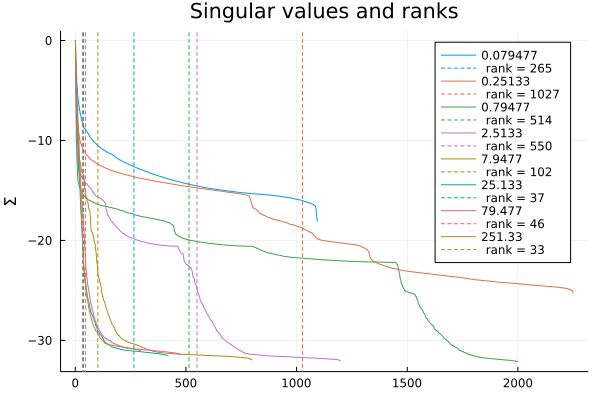

In [66]:
γ = ["0.079477", "0.25133", "0.79477", "2.5133", "7.9477", "25.133", "79.477", "251.33"]

colors = permutedims(1:8)

A, Ac, C, x₀, n, Σ = get_kurt_lsid(directory*res_file_name, "gamma_"*γ[1])
x = 1:length(Σ'); y = Σ'
plt = plot(x, y, label = γ[1], color = colors[1])
plt = vline!([n], label = " rank = "*string(n), color = colors[1], line = (1, :dash))

for i in 2:length(γ)
    γᵢ = γ[i]
    A, Ac, C, x₀, n, Σ = get_kurt_lsid(directory*res_file_name, "gamma_"*γᵢ)
    x = 1:length(Σ'); y = Σ'
    plt = plot!(x, y, label = γᵢ, color = colors[i])
    plt = vline!([n], label = " rank = "*string(n), color = colors[i], line = (1, :dash))
end

#plt=xlims!(1,200)
plt=title!("Singular values and ranks")
plt=ylabel!("Σ")
plt

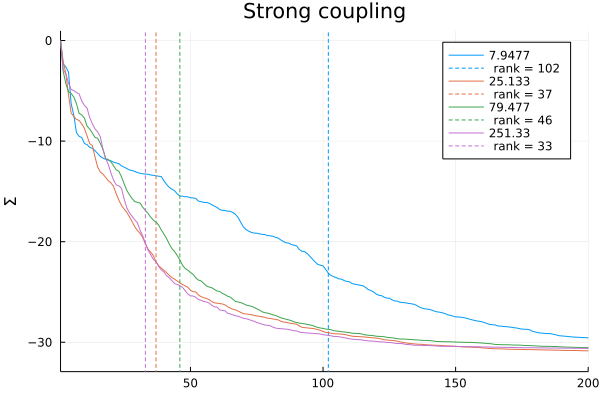

In [67]:
γ = ["7.9477", "25.133", "79.477", "251.33"]

colors = permutedims(1:8)

A, Ac, C, x₀, n, Σ = get_kurt_lsid(directory*res_file_name, "gamma_"*γ[1])
x = 1:length(Σ'); y = Σ'
plt = plot(x, y, label = γ[1], color = colors[1])
plt = vline!([n], label = " rank = "*string(n), color = colors[1], line = (1, :dash))

for i in 2:length(γ)
    γᵢ = γ[i]
    A, Ac, C, x₀, n, Σ = get_kurt_lsid(directory*res_file_name, "gamma_"*γᵢ)
    x = 1:length(Σ'); y = Σ'
    plt = plot!(x, y, label = γᵢ, color = colors[i])
    plt = vline!([n], label = " rank = "*string(n), color = colors[i], line = (1, :dash))
end

plt=xlims!(1,200)
plt=ylabel!("Σ")
plt=title!("Strong coupling")

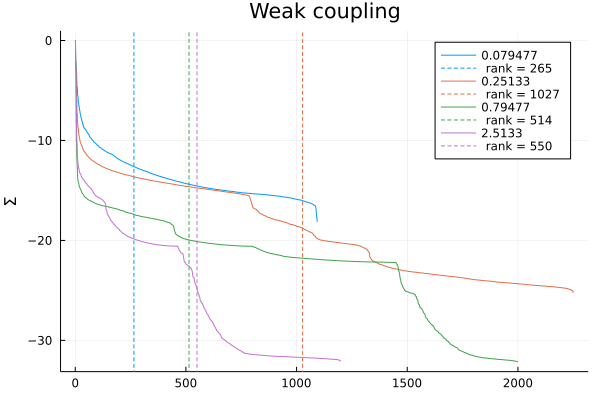

In [68]:
γ = ["0.079477", "0.25133", "0.79477", "2.5133"]

colors = permutedims(1:8)

A, Ac, C, x₀, n, Σ = get_kurt_lsid(directory*res_file_name, "gamma_"*γ[1])
x = 1:length(Σ'); y = Σ'
plt = plot(x, y, label = γ[1], color = colors[1])
plt = vline!([n], label = " rank = "*string(n), color = colors[1], line = (1, :dash))

for i in 2:length(γ)
    γᵢ = γ[i]
    A, Ac, C, x₀, n, Σ = get_kurt_lsid(directory*res_file_name, "gamma_"*γᵢ)
    x = 1:length(Σ'); y = Σ'
    plt = plot!(x, y, label = γᵢ, color = colors[i])
    plt = vline!([n], label = " rank = "*string(n), color = colors[i], line = (1, :dash))
end

#plt=xlims!(1,200)
plt=title!("Weak coupling")
plt=ylabel!("Σ")
plt

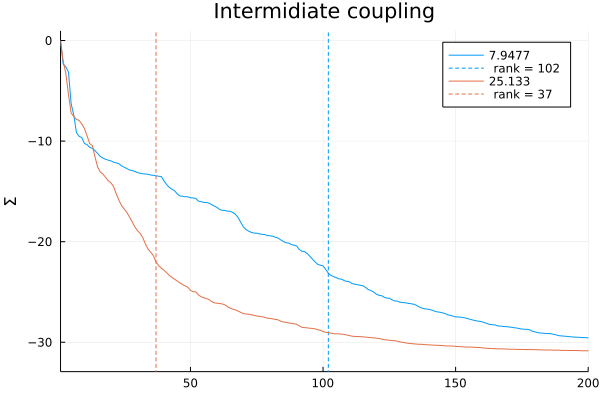

In [70]:
γ = [ "7.9477", "25.133"]

colors = permutedims(1:8)

A, Ac, C, x₀, n, Σ = get_kurt_lsid(directory*res_file_name, "gamma_"*γ[1])
x = 1:length(Σ'); y = Σ'
plt = plot(x, y, label = γ[1], color = colors[1])
plt = vline!([n], label = " rank = "*string(n), color = colors[1], line = (1, :dash))

for i in 2:length(γ)
    γᵢ = γ[i]
    A, Ac, C, x₀, n, Σ = get_kurt_lsid(directory*res_file_name, "gamma_"*γᵢ)
    x = 1:length(Σ'); y = Σ'
    plt = plot!(x, y, label = γᵢ, color = colors[i])
    plt = vline!([n], label = " rank = "*string(n), color = colors[i], line = (1, :dash))
end

plt=xlims!(1,200)
plt=title!("Intermidiate coupling")
plt=ylabel!("Σ")
plt